# Assignment 3
## Author:Keoikantse Magano
## Date 14 April 2023
## Source :Kaggle
## Github url:https://github.com/802046276/Assignment_3

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
df = pd.read_csv("Student-Employability-Datasets.csv")
df.head(10)


,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable
5,Student 6,4,4,3,3,3,3,3,5,Employable
6,Student 7,4,4,4,3,3,3,3,3,Employable
7,Student 8,5,3,3,4,3,3,3,5,Employable
8,Student 9,4,4,4,4,4,4,4,5,Employable
9,Student 10,4,4,3,4,3,4,4,5,Employable


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


In [4]:
df.isnull().sum()

Name of Student               0
GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

In [5]:
cleanedData = df.drop(['Name of Student', 'CLASS'], axis = 1)


In [6]:
cleanedData.head(10)

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
0,4,5,4,5,5,5,5,5
1,4,4,4,4,4,4,3,5
2,4,3,3,3,3,3,2,5
3,3,3,3,2,3,3,3,5
4,4,4,3,3,4,4,3,5
5,4,4,3,3,3,3,3,5
6,4,4,4,3,3,3,3,3
7,5,3,3,4,3,3,3,5
8,4,4,4,4,4,4,4,5
9,4,4,3,4,3,4,4,5


In [7]:
n = cleanedData.count()
mean_ = cleanedData.mean()
median_ = cleanedData.median()
mode_ = cleanedData.apply(lambda x: x.value_counts().idxmax())
std_ = np.sqrt(cleanedData.apply(lambda x: np.sum((x -
x.mean())**2)) / (n - 1))
var_ = std_ ** 2
kurtosis_ = cleanedData.apply(lambda x: np.sum(((x - x.mean())
/ x.std())**4)) / n - 3
skewness_ = cleanedData.apply(lambda x: np.sum(((x - x.mean())
/ x.std())**3)) / n
range_ = cleanedData.max() - cleanedData.min()
min_ = cleanedData.min()
max_ = cleanedData.max()
sum_ = cleanedData.sum()
count_ = cleanedData.count()
largest_1 = cleanedData.apply(lambda x: x.nlargest(1).iloc[0])
smallest_1 = cleanedData.apply(lambda x: x.nsmallest(1).iloc[0])
cv_ = std_ / mean_
quartile1_ = cleanedData.apply(lambda x: np.percentile(x, 25))
quartile2_ = cleanedData.apply(lambda x: np.percentile(x, 50))
quartile3_ = cleanedData.apply(lambda x: np.percentile(x, 75))
interquartileRange_ = quartile3_ - quartile1_
mad_ =cleanedData.apply(lambda x: np.mean(np.abs(x - x.mean())))
mead_ =cleanedData.apply(lambda x: np.median(np.abs(x - x.median())))
qcd_ = (quartile3_ - quartile1_) / (quartile3_ + quartile1_)
percentile10_ = cleanedData.apply(lambda x: np.percentile(x, 10))
percentile90_ = cleanedData.apply(lambda x: np.percentile(x, 90))

#z_scores_all = (water_potability - mean_all) / std_all


summary_df = pd.DataFrame({'Mean': mean_, 'Median': median_,
'Mode': mode_, 'Standard Deviation': std_,
                           'Sample Variance': var_, 'Kurtosis':
kurtosis_, 'Skewness': skewness_,
                           'Range': range_, 'Minimum': min_,
'Maximum': max_, 'Sum': sum_, 'Count': count_,
                           'Largest(1)': largest_1, 'Smallest(1)':
smallest_1,'Coefficient of Variation' : cv_,  'Quartile 1':  quartile1_, 'Quartile 2' : quartile2_, 'Quartile 3' : quartile3_, 'InterQuartile Range' : interquartileRange_, 'Mean Absolute Deviation' :  mad_, 'Median Absolute Deviation' :  mead_, 'Quartile Coefficient of Disperssion' : qcd_, 'Percentile 10' : percentile10_, 'Percentile 90' :  percentile90_ })
# Add borders to the table
summary_df_styled = summary_df.style.set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]},
                                                       {'selector': 'td', 'props': [('border', '1px solid black')]}]) \
                                     .background_gradient(cmap='coolwarm', axis=None)


# Display the styled table
summary_df_styled



,Mean,Median,Mode,Standard Deviation,Sample Variance,Kurtosis,Skewness,Range,Minimum,Maximum,Sum,Count,Largest(1),Smallest(1),Coefficient of Variation,Quartile 1,Quartile 2,Quartile 3,InterQuartile Range,Mean Absolute Deviation,Median Absolute Deviation,Quartile Coefficient of Disperssion,Percentile 10,Percentile 90
GENERAL APPEARANCE,4.246814,4.000000,4,0.678501,0.460364,-0.390860,-0.451960,3,2,5,12664,2982,5,2,0.159767,4.000000,4.000000,5.000000,1.000000,0.570320,1.000000,0.111111,3.000000,5.000000
MANNER OF SPEAKING,3.884641,4.000000,4,0.757013,0.573068,-0.783788,-0.027994,3,2,5,11584,2982,5,2,0.194873,3.000000,4.000000,4.000000,1.000000,0.595848,1.000000,0.142857,3.000000,5.000000
PHYSICAL CONDITION,3.972166,4.000000,4,0.744135,0.553737,-0.797286,-0.111578,3,2,5,11845,2982,5,2,0.187337,3.000000,4.000000,5.000000,2.000000,0.545689,1.000000,0.250000,3.000000,5.000000
MENTAL ALERTNESS,3.962777,4.000000,4,0.781982,0.611496,-0.705320,-0.212694,3,2,5,11817,2982,5,2,0.197332,3.000000,4.000000,5.000000,2.000000,0.584738,1.000000,0.250000,3.000000,5.000000
SELF-CONFIDENCE,3.910798,4.000000,4,0.807602,0.652222,-1.193306,0.037190,3,2,5,11662,2982,5,2,0.206506,3.000000,4.000000,5.000000,2.000000,0.664151,1.000000,0.250000,3.000000,5.000000
ABILITY TO PRESENT IDEAS,3.813883,4.000000,4,0.739390,0.546697,-0.433966,-0.097752,3,2,5,11373,2982,5,2,0.193868,3.000000,4.000000,4.000000,1.000000,0.589943,0.000000,0.142857,3.000000,5.000000
COMMUNICATION SKILLS,3.525486,3.000000,3,0.743881,0.553359,-0.352290,0.218191,3,2,5,10513,2982,5,2,0.211001,3.000000,3.000000,4.000000,1.000000,0.652749,1.000000,0.142857,3.000000,4.000000
Student Performance Rating,4.610664,5.000000,5,0.692845,0.480034,0.697508,-1.491878,2,3,5,13749,2982,5,3,0.150270,4.000000,5.000000,5.000000,1.000000,0.569773,0.000000,0.111111,3.000000,5.000000


In [8]:
import pandas as pd
data = pd.read_csv("Student-Employability-Datasets.csv")

In [9]:
corr_matrix = data[["Student Performance Rating", "COMMUNICATION SKILLS"]].corr()
corr = corr_matrix.iloc[0,1]
print("Correlation between Student Performance Rating and COMMUNICATION SKILLS:", corr)

Correlation between Student Performance Rating and COMMUNICATION SKILLS: 0.04822314232315365


In [10]:
import matplotlib.pyplot as plt
import numpy as np

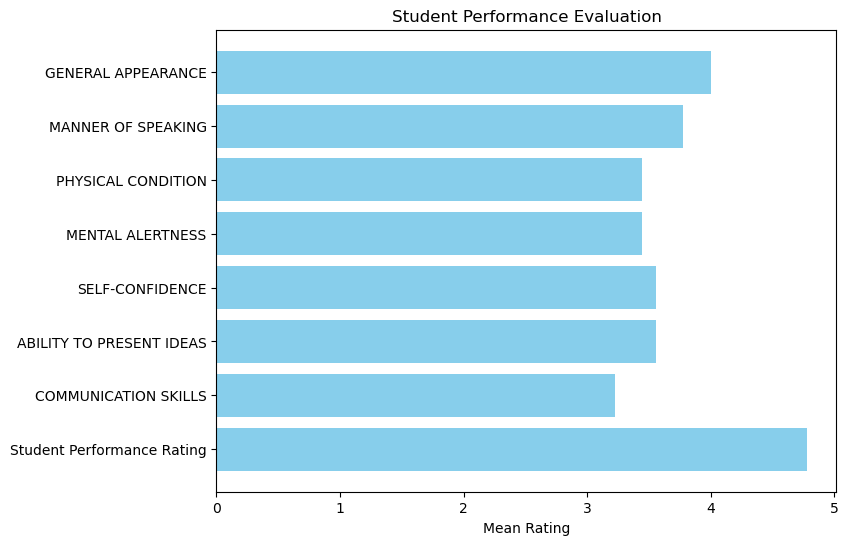

In [11]:
# Define the data
labels = ['GENERAL APPEARANCE', 'MANNER OF SPEAKING', 'PHYSICAL CONDITION', 'MENTAL ALERTNESS',
          'SELF-CONFIDENCE', 'ABILITY TO PRESENT IDEAS', 'COMMUNICATION SKILLS', 'Student Performance Rating']
data = np.array([[4, 5, 4, 5, 5, 5, 5, 5],
                 [4, 4, 4, 4, 4, 4, 3, 5],
                 [4, 3, 3, 3, 3, 3, 2, 5],
                 [3, 3, 3, 2, 3, 3, 3, 5],
                 [4, 4, 3, 3, 4, 4, 3, 5],
                 [4, 4, 3, 3, 3, 3, 3, 5],
                 [4, 4, 4, 3, 3, 3, 3, 3],
                 [5, 3, 3, 4, 3, 3, 3, 5],
                 [4, 4, 4, 4, 4, 4, 4, 5],
                 [4, 4, 3, 4, 3, np.nan, np.nan, np.nan]])

# Remove rows with missing data
data = data[~np.isnan(data).any(axis=1)]

# Calculate the mean ratings for each category
means = data.mean(axis=0)

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 6))
y_pos = np.arange(len(labels))
ax.barh(y_pos, means, align='center', color='skyblue')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Mean Rating')
ax.set_title('Student Performance Evaluation')
plt.show()

In [12]:
data1 = np.random.randn(100)

<BarContainer object of 10 artists>

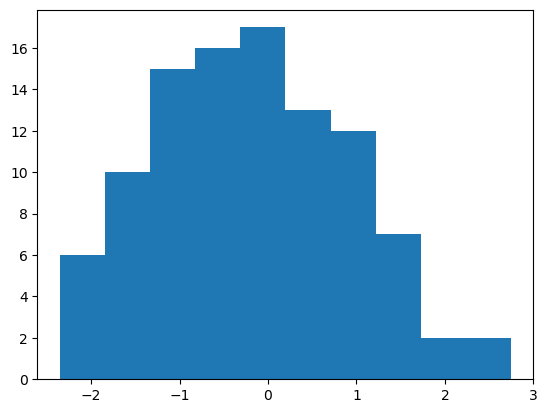

In [13]:
plt.figure()
hist1, edges1 = np.histogram(data1)
plt.bar(edges1[:-1], hist1, width=edges1[1:]-edges1[:-1])

In [14]:
data = pd.read_csv("Student-Employability-Datasets.csv")

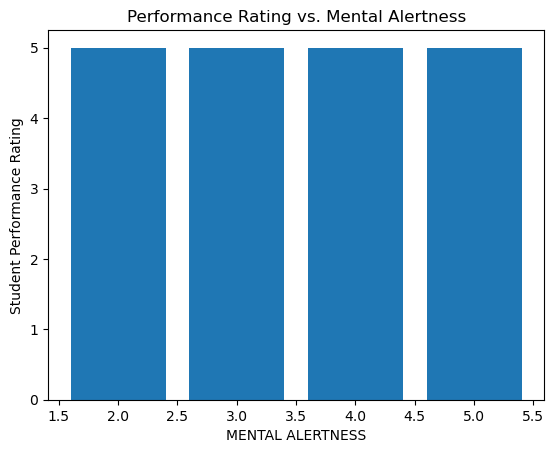

In [15]:
# Extract the required data from the dataframe
mental_alertness = data['MENTAL ALERTNESS']
performance_rating = data['Student Performance Rating']

# Create the bar plot
plt.bar(mental_alertness, performance_rating)
plt.xlabel('MENTAL ALERTNESS')
plt.ylabel('Student Performance Rating')
plt.title('Performance Rating vs. Mental Alertness')
plt.show()

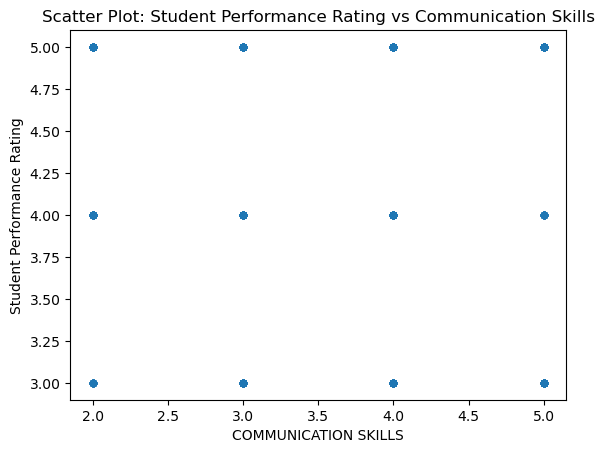

In [16]:
data.plot(kind='scatter', x='COMMUNICATION SKILLS', y='Student Performance Rating', 
          title='Scatter Plot: Student Performance Rating vs Communication Skills')
plt.show()

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


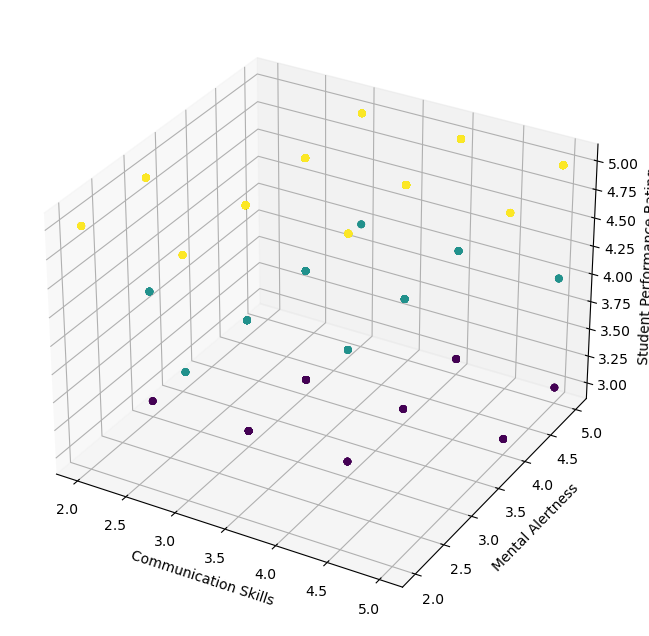

In [18]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x = data['COMMUNICATION SKILLS']
y = data['MENTAL ALERTNESS']
z = data['Student Performance Rating']

ax.scatter(x, y, z, c=z, cmap='viridis')
ax.set_xlabel('Communication Skills')
ax.set_ylabel('Mental Alertness')
ax.set_zlabel('Student Performance Rating')

plt.show()


In [19]:
data = pd.read_csv("Student-Employability-Datasets.csv")

# Comparing Excel and Python for Descriptive Statistics: Reflections on Programming and Stats Knowledge

In this assignment, I compared my experience using Excel to apply descriptive statistics with my previous assignment using Python and Jupyter Notebook. Excel's interface is more user-friendly, and it's easier to navigate and apply functions compared to coding in Python. However, Excel lacks the ability to perform complex data manipulation, whereas Python allows for more in-depth cleaning and processing of data.

In terms of descriptive statistics, both tools offer similar functions, such as mean, median, mode, standard deviation, and variance. However, Python's libraries offer more advanced statistics, such as skewness and kurtosis, that Excel does not have. Additionally, Python has a more extensive collection of visualization libraries that make it easier to create complex graphs and charts.

I would use Excel for smaller datasets or when working with non-technical stakeholders who are more comfortable with spreadsheet software. Python would be my choice for larger datasets or when I need more advanced data manipulation and processing capabilities.

If I could do this assignment over again, I would like to explore more advanced statistics and data visualization techniques beyond what was covered in class. Additionally, I would like to learn more about how to clean and preprocess data effectively to improve data accuracy and quality.

Overall, I believe that there are still gaps in my programming and stats knowledge, especially in more advanced techniques beyond the basics. I plan to continue learning and practicing these skills to become a more effective data analyst.



